In [1]:
import sqlite3
import pandas as pd
import html
import re
from collections import defaultdict
import lxml.etree as ET

re1 = re.compile(r'  +')
def clean_text(x, remove_html=True):
    if remove_html:
        x = re.sub(r'<code>[^>]*</code>', '', x)
        x = re.sub(r'<[^>]*>', '', x)
    x = x.replace('#39;', "'").replace('amp;', '&').replace('#146;', "'").replace(
        'nbsp;', ' ').replace('#36;', '$').replace('\\n', "\n").replace('quot;', "'").replace(
        '<br />', "\n").replace('\\"', '').replace('<unk>','u_n').replace(' @.@ ','.').replace(
        ' @-@ ','-').replace('\\', ' \\ ').replace('"',"'").replace('\n', ' ').replace('\r', ' ').strip()
    return re1.sub(' ', html.unescape(x))

In [2]:
%%time

name = 'StackOverflow'
connection = sqlite3.connect('{}.db'.format(name))
c = connection.cursor()

# post_duplicates = defaultdict(list)

def find_post_id(post_id, column):
    df = pd.read_sql("""SELECT {} FROM posts WHERE comment_id == {}""".format(column, post_id), connection)
    return df[column][0]

def check_if_exists(id_):
    sql = "SELECT EXISTS(SELECT 1 FROM posts WHERE comment_id = '{}' LIMIT 1);".format(id_)
    c.execute(sql)
    result = c.fetchone()
    if result[0] == 1: return True
    else: return False 

def post_link_iter(context):
#     c = 0
    post_duplicates = defaultdict(list)
    row_counter = 0
    for event, elem in context:
        try:
            row_counter += 1
            if elem.attrib['LinkTypeId'] == '3':
                if elem.attrib['PostId'] and elem.attrib['RelatedPostId']:
                    post_id = int(elem.attrib['PostId'])
                    related_post_id = int(elem.attrib['RelatedPostId'])
                    # so we don't have possible duplicates
                    if post_id > related_post_id:
                        # only append if we have the row in the database, since some are comments and not posts. 
                        if check_if_exists(related_post_id):
                            if check_if_exists(post_id):
                                post_duplicates[related_post_id].append(post_id)
    #                     find_post_id(post_id, 'title')
    #                     find_post_id(related_post_id, 'title')
            elem.clear()
            # Also eliminate now-empty references from the root node to elem
            for ancestor in elem.xpath('ancestor-or-self::*'):
                while ancestor.getprevious() is not None:
                    del ancestor.getparent()[0]
            if row_counter % 1000000 == 0:
                print(row_counter)
        except Exception as e:
            print(str(e))
#         c += 1
#         if c == 1000000: break 
    del context
    return post_duplicates



context = ET.iterparse('data/PostLinks.xml', events=('end', ))
post_duplicates = post_link_iter(context)

1000000
2000000
3000000
4000000
5000000
'LinkTypeId'
CPU times: user 1min 20s, sys: 6.8 s, total: 1min 27s
Wall time: 1min 42s


In [4]:
len(post_duplicates)

194866

In [5]:
post_duplicates[9]

[18584,
 673476,
 2902401,
 2237587,
 2194999,
 3152977,
 3889845,
 3411121,
 7053636,
 9309770,
 9480441,
 11717149,
 14476817,
 16504240,
 20347363,
 14766086,
 22095371,
 23540039,
 26504044,
 29754651,
 32327470,
 34169381,
 34260000,
 4127363,
 39926161,
 40114337,
 42776911,
 45017342,
 45011254,
 45024300,
 48499892]

In [7]:
name = 'StackOverflow'
connection = sqlite3.connect('{}.db'.format(name))
c = connection.cursor()

df = pd.read_sql("""SELECT * FROM posts WHERE comment_id IN """ + str(tuple([18584,
 673476,
 2902401,
 2237587,
 2194999,
 3152977,
 3889845,
 3411121,
 7053636,
 9309770,
 9480441,
 11717149,
 14476817,
 16504240,
 20347363,
 14766086,
 22095371,
 23540039,
 26504044,
 29754651,
 32327470,
 34169381,
 34260000,
 4127363,
 39926161,
 40114337,
 42776911,
 45017342,
 45011254,
 45024300,
 48499892])), connection)
# df = pd.read_sql("IF [NOT] EXISTS ( SELECT 1 FROM posts WHERE comment_id = '{}' )".format(id_))
df

,comment_id,parent_id,comment,title,date,score,tags
0,18584,None,<blockquote> <p><strong>Possible Duplicate:</s...,Exact age calculation,2008-08-20,1,c#
1,673476,None,<h3>Duplicate</h3> <blockquote> <p><a href='ht...,Age in years from DateTime (Date of birth),2009-03-23,6,c# datetime
2,2194999,None,<blockquote> <p><strong>Possible Duplicate:</s...,How to calculate an age based on a birthday?,2010-02-03,16,c# asp.net-mvc date-arithmetic
3,2237587,None,<blockquote> <p><strong>Possible Duplicate:</s...,how can i calculate age by datetimepicker,2010-02-10,1,c#
4,2902401,None,<blockquote> <p><strong>Possible Duplicates:</...,Calculating age based on date of birth in SQL ...,2010-05-25,1,sql-server sql-server-2005 c#-2.0
5,3152977,None,<blockquote> <p><strong>Possible Duplicate:</s...,Calculate the difference between two dates and...,2010-06-30,34,c# datetime timespan
6,3411121,None,<blockquote> <p><strong>Possible Duplicate:</s...,How do I calculate someone's Age?,2010-08-05,0,c# .net datetime
7,3889845,None,<blockquote> <p><strong>Possible Duplicate:</s...,what is the simplest and correct way to calcul...,2010-10-08,1,c#
8,4127363,None,<p>How can I calculate date difference between...,Date difference in years using C#,2010-11-08,55,c# date datediff
9,7053636,None,<blockquote> <p><strong>Possible Duplicate:</s...,age calculation,2011-08-13,0,c# .net datetime


In [9]:
dat = []

with open('data/starspace_train.tsv', 'r') as f:
    for line in f:
         dat.append(line.split('\t'))

In [12]:
all_len = []

for x in dat:
    all_len.append(len(x))

(array([9.98389e+05, 1.51800e+03, 6.30000e+01, 2.00000e+01, 4.00000e+00,
        0.00000e+00, 1.00000e+00, 1.00000e+00, 2.00000e+00, 1.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([ 2.  ,  6.65, 11.3 , 15.95, 20.6 , 25.25, 29.9 , 34.55, 39.2 ,
        43.85, 48.5 , 53.15, 57.8 , 62.45, 67.1 , 71.75, 76.4 , 81.05,
        85.7 , 90.35, 95.  ]),
 <a list of 20 Patch objects>)

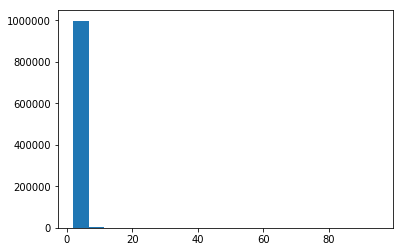

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.hist(all_len, bins=20)

In [58]:
valid_duplicated = defaultdict(list)

def check_if_exists(id_):
    sql = "SELECT EXISTS(SELECT 1 FROM posts WHERE comment_id = '{}' LIMIT 1);".format(id_)
    c.execute(sql)
    result = c.fetchone()
    if result[0] == 1: return True
    else: return False 

check_if_exists(84556)
# for orig, dups in post_duplicates.items():
#     for dup_id in dups:
#         if check_if_exists(dup_id) == 1:
#             valid_duplicated[orig].append(dup_id)


True

In [54]:
# post_duplicates[3748]
v = 3748
print(pd.read_sql("""SELECT title FROM posts WHERE comment_id == {}""".format(3748), connection).title[0])
for i in valid_duplicated[3748]:
    print(pd.read_sql("""SELECT title FROM posts WHERE comment_id == {}""".format(i), connection))

Storing Images in DB - Yea or Nay?
                          title
0  Storing images on a database
                                               title
0  Should I store my images in the database or fo...
                                               title
0  Is it good to store images in database or file...
                                               title
0  Storing Images In Filesystem As Files Or In BL...
                                               title
0  Storing profile pictures. (Database or Filesys...
                                               title
0  What is better practise: storing images in MyS...
                          title
0  storing picture in database?
                                        title
0  Store images in database or on file system
                                               title
0  What are the Advantages and Disadvantages of S...
              title
0  PHP User Avatars
                                       title
0  Image Uploading -- is

In [59]:
len(post_duplicates[1711])

38

In [62]:
post_duplicates

defaultdict(list,
            {73713: [86947, 4219261, 4867909, 9059085],
             8127: [26925],
             48935: [81150, 10983688, 13798857],
             1854: [110362],
             21288: [100322, 2417642, 5140347],
             56107: [100358, 6443978, 11304400, 11620534, 13126238],
             114149: [132592, 2968210],
             91071: [143072],
             58119: [150743],
             5727: [153874, 2271490, 5972736, 8136724, 14552132],
             92001: [153874],
             96285: [153874],
             203616: [204739, 1914279],
             65820: [177251, 3792279],
             22907: [59880],
             9: [18584,
              673476,
              2902401,
              2237587,
              2194999,
              3152977,
              3889845,
              3411121,
              7053636,
              9309770,
              9480441,
              11717149,
              14476817],
             59880: [208976],
             43743: [221944],
       